# Clustering Jerárquico en el Dataset Zoo
Este notebook es una base para la tarea de clustering jerárquico usando el dataset Zoo.

In [ ]:
# Paso 1: Cargar el dataset
import pandas as pd

df = pd.read_csv('zoo.csv')
df.head()


,aardvark,1,0,0.1,1.1,0.2,0.3,1.2,1.3,1.4,1.5,0.4,0.5,4,0.6,0.7,1.6,1.7
0,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
1,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [3]:
# Paso 2: Preprocesamiento (One Hot Encoding y Escalamiento)

from sklearn.preprocessing import StandardScaler

# Guardar nombre y tipo de los animales
animal_names = df.iloc[:, 0]
labels_true = df.iloc[:, -1]
# Eliminar primera y ultima columna 
X = df.iloc[:, 1:-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Paso 3: Clustering Jerárquico
from scipy.cluster.hierarchy import linkage, fcluster
import seaborn as sns
import matplotlib.pyplot as plt
linkage_matrix = linkage(X_scaled, method="ward")

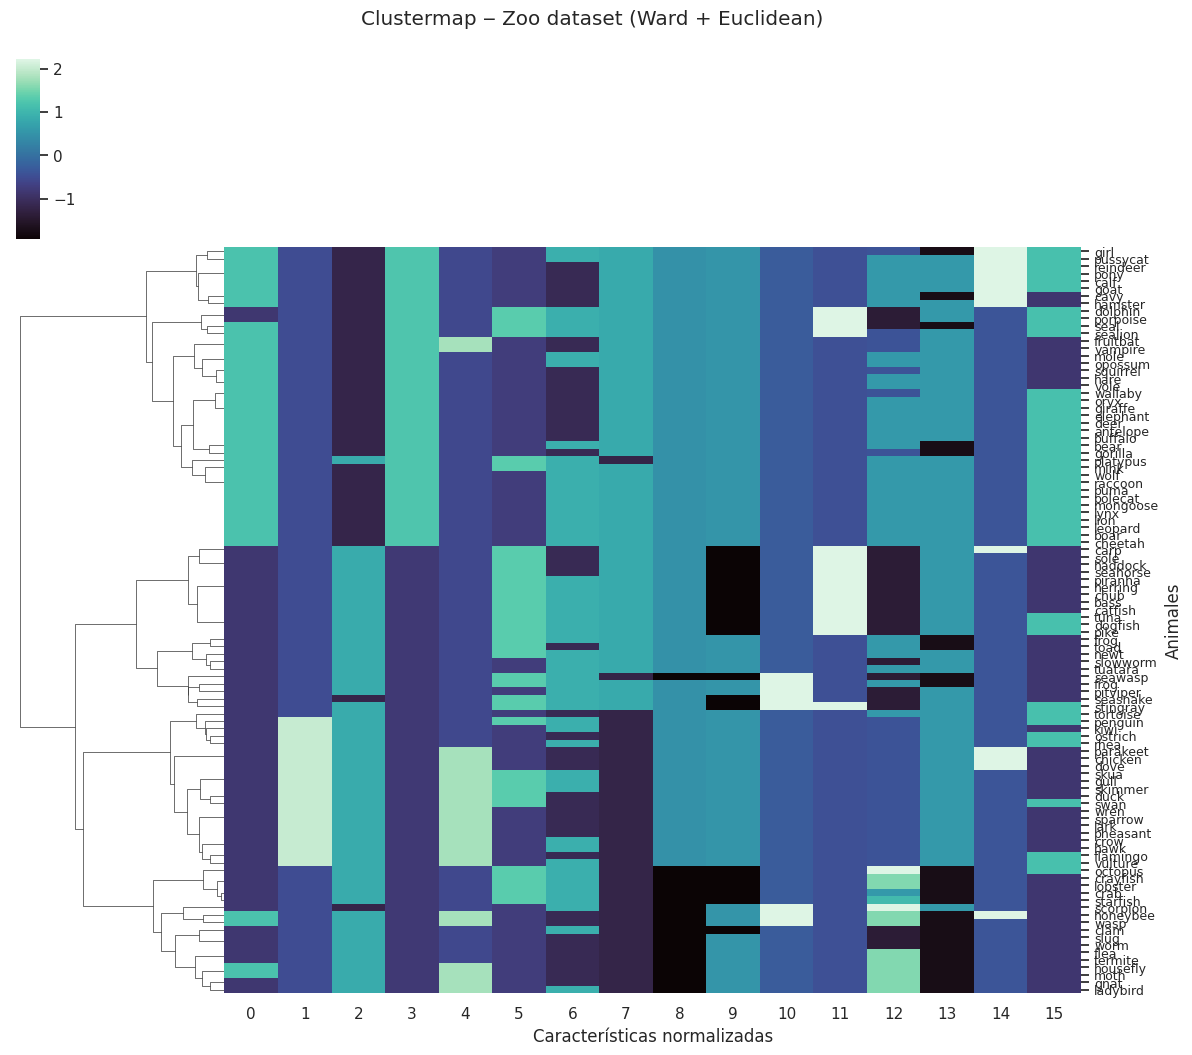

In [5]:
# Paso 4: Heatmap


# 2⃣  Dibuja clustermap: dendrograma (filas) + heatmap de características
sns.set_theme(style="white")
g = sns.clustermap(
    X_scaled,                    # datos ya escalados
    row_linkage=linkage_matrix,  # dendrograma para filas
    col_cluster=False,           # no agrupar columnas; solo animales
    figsize=(12, 10),
    cmap="mako",                 # paleta (prueba 'viridis', 'vlag', etc.)
    yticklabels=animal_names,    # etiquetas de filas
    robust=True,                 # ignora outliers extremos en la escala de color
    dendrogram_ratio=0.2,        # espacio reservado al dendrograma
    cbar_pos=(0.02, 0.8, 0.02, 0.18)  # posición de la barra de color
)

# Ajustar orientación de etiquetas para que se lean cómodamente
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0, fontsize=9)
g.ax_heatmap.set_xlabel("Características normalizadas")
g.ax_heatmap.set_ylabel("Animales")
g.fig.suptitle("Clustermap ‒ Zoo dataset (Ward + Euclidean)", y=1.03)
plt.show()

# 3⃣  (Opcional) Extraer etiquetas de clúster desde la matriz de enlace
n_clusters = 4                # elige el nº de grupos que necesites
clusters = fcluster(linkage_matrix, t=n_clusters, criterion="maxclust")
df["cluster"] = clusters      # añade la asignación al DataFrame original

# Conclusiones
Escribe aquí tus conclusiones sobre las agrupaciones obtenidas en el clustering jerárquico.

## Pregunta 1
1. ¿Cuántos clusters se pueden identificar claramente en el dendrograma?

Escribe tu respuesta aquí.

## Pregunta 2
2. ¿Qué características parecen determinar la formación de los clusters?

Escribe tu respuesta aquí.

## Pregunta 3
3. ¿Los resultados del clustering tienen sentido biológico o zoológico?

Escribe tu respuesta aquí.

## Pregunta 4
4. ¿Cómo afecta la normalización de los datos al clustering?

Escribe tu respuesta aquí.

## Pregunta 5
5. ¿Qué método de linkage utilizaste y por qué?

Escribe tu respuesta aquí.

## Pregunta 6
6. ¿Qué otras técnicas de clustering podrías aplicar a este dataset y por qué?

Escribe tu respuesta aquí.